In [ ]:
import numpy as np
from RL import grid_world_mdp
from RL import RL
from RL import grid_display

In [ ]:
grid_rows = 4
grid_cols = 4
actions = 4
terminal_states = [0, 15]

# Creating Grid World MDP

## - Default is to have -1 reward for each move and no noise meaning if an action is chosen it will be executed unless that actions is not a legal move, in which case the move will lead you to stay in the same grid square.

In [3]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states)
rl = RL(mdp)

# Creating a Noisy Reward MDP.

In [4]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states, prob_noise=.5, reward_noise=.5)
rl = RL(mdp)

# Iterative Policy Evaluation Under Random Policy

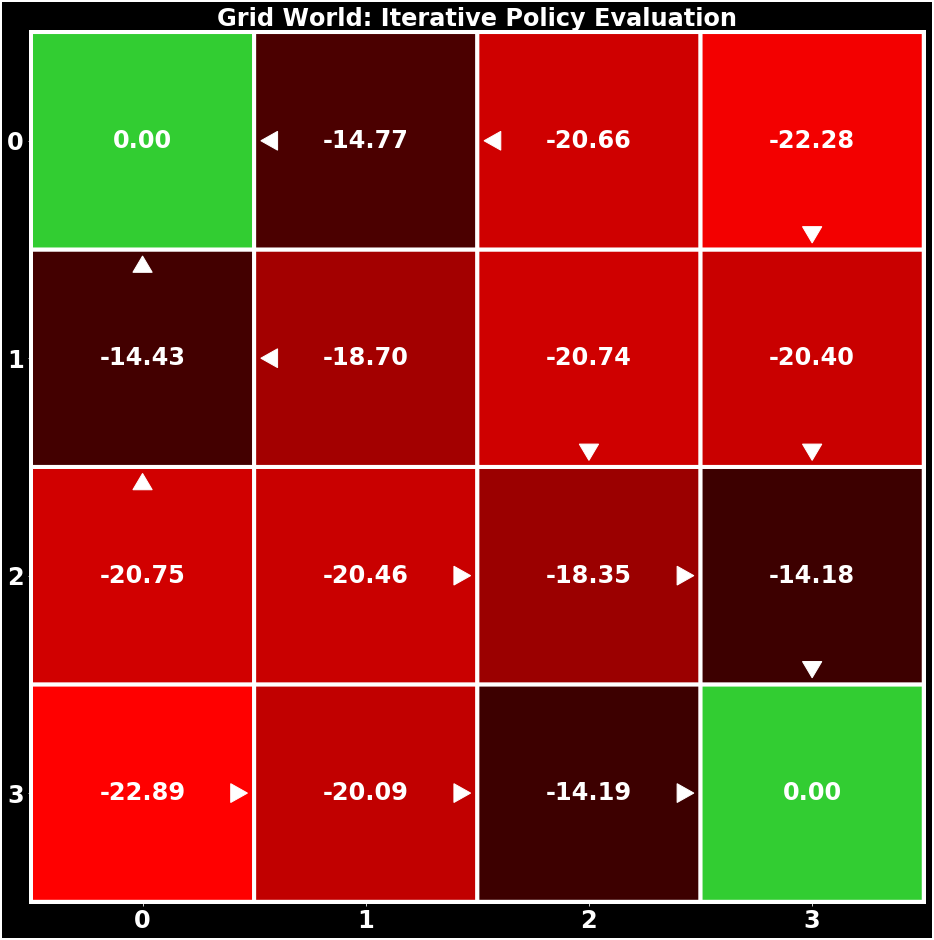

In [5]:
rl.iterative_policy_evaluation()

display = grid_display(rl, title='Grid World: Iterative Policy Evaluation')
display.show_values()

# Policy Iteration to find optimal policy and the value function under the optimal policy

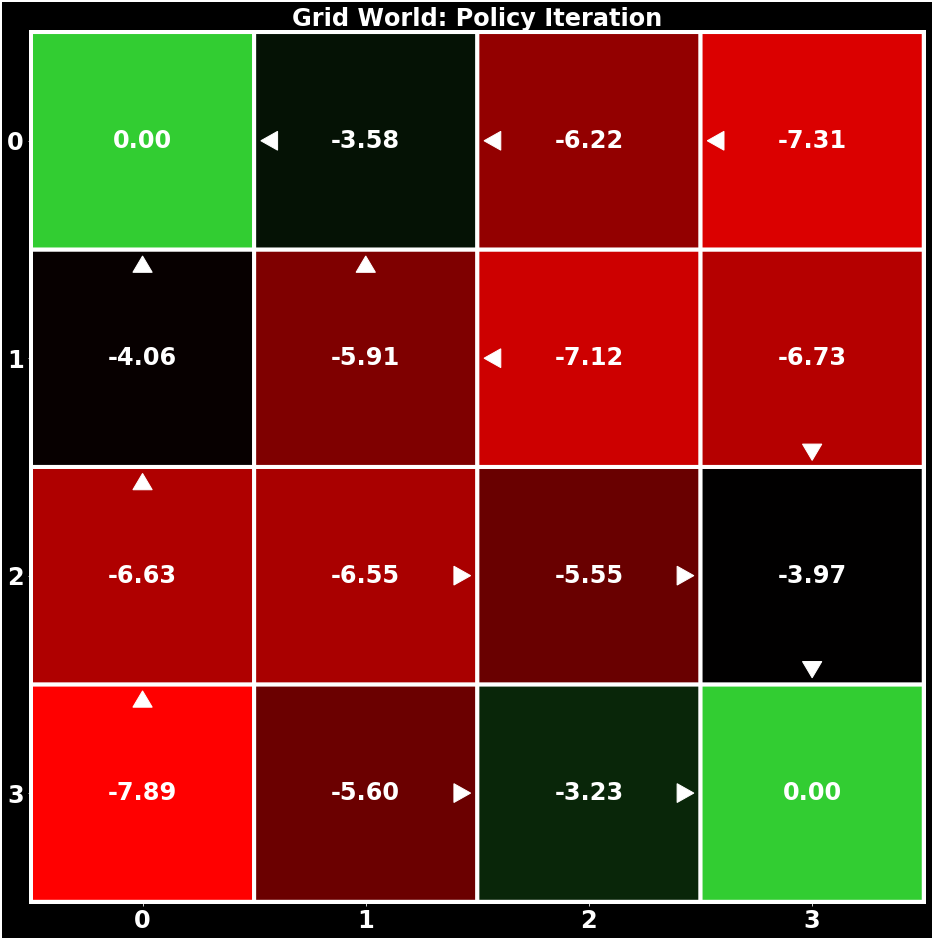

In [6]:
rl.policy_iteration()

display = grid_display(rl, title='Grid World: Policy Iteration')
display.show_values()

# Value Iteration

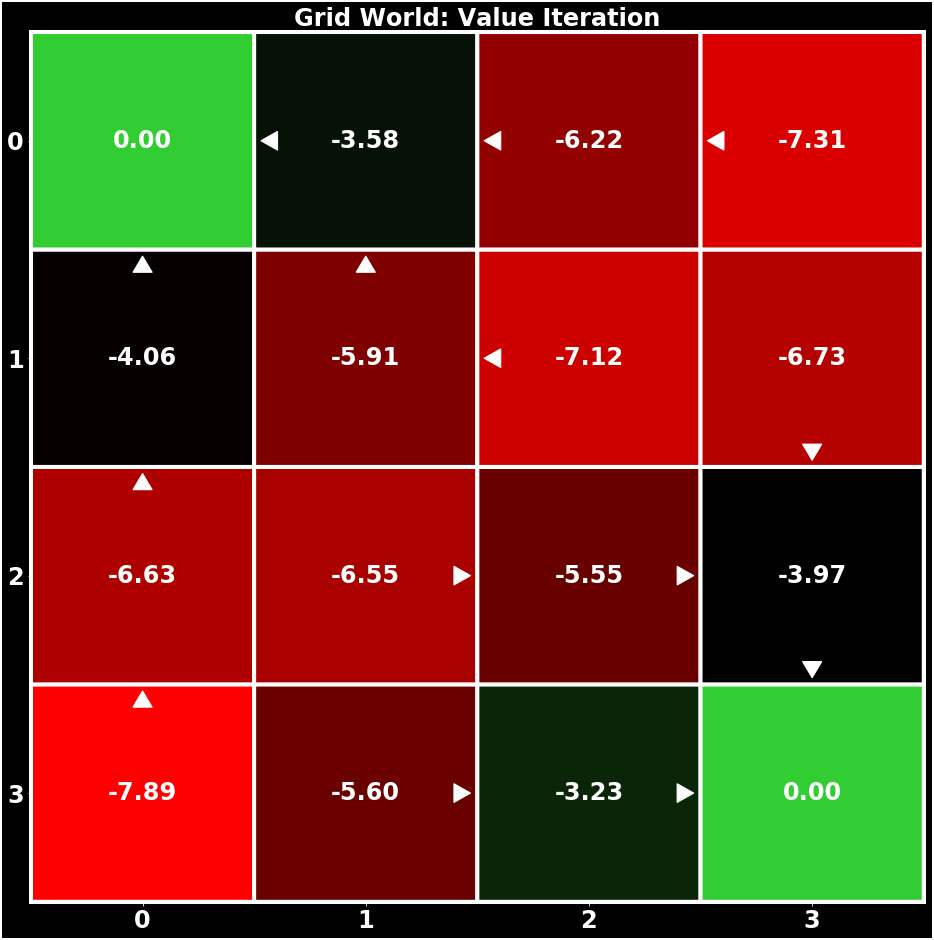

In [7]:
rl.value_iteration()

display = grid_display(rl, title='Grid World: Value Iteration')
display.show_values()

# One step temporal difference 

# - Evaluating the value function for the optimal policy from earlier using one step temporal difference.

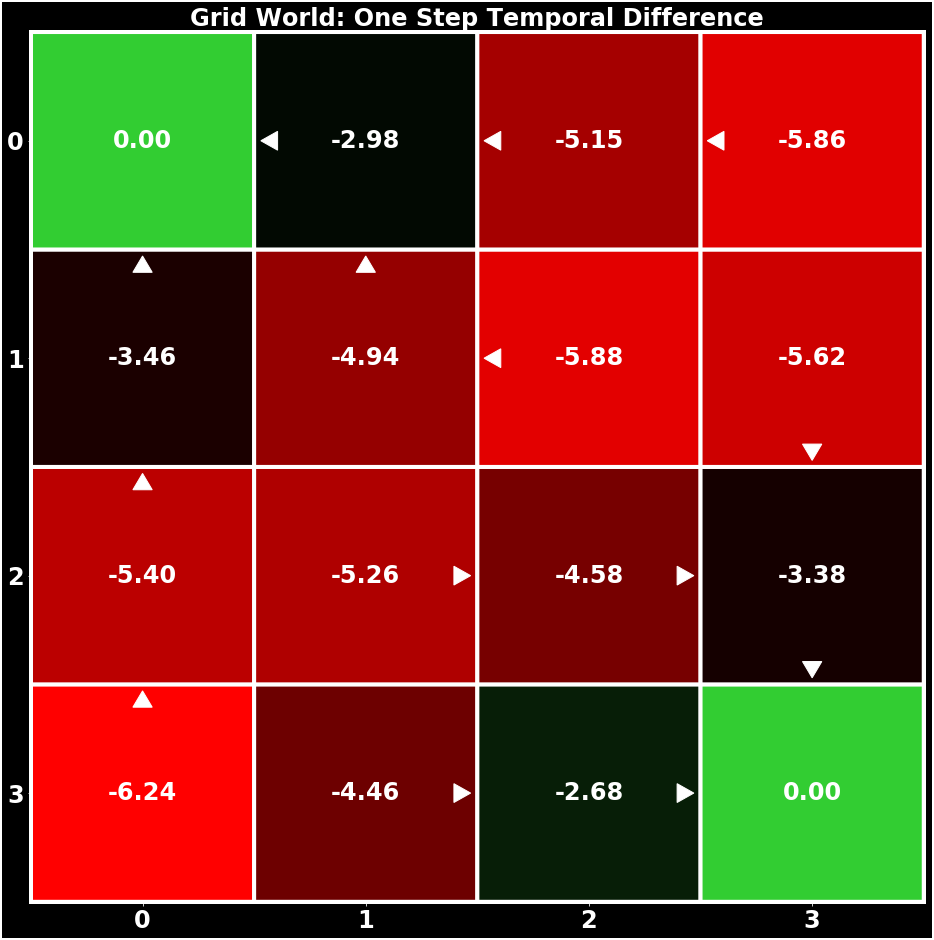

In [12]:
rl.one_step_temporal_difference(num_episodes=10000)

display = grid_display(rl, title='Grid World: One Step Temporal Difference')
display.show_values()

# Q-Value Iteration

In [ ]:
rl.q_value_iteration()
display = grid_display(rl, title='Grid World: Q-Value Iteration')

display.show_q_values()

In [ ]:
rl.test_optimal_q()

# SARSA

In [ ]:
rl.sarsa(alpha=.2, tau=.1)
display = grid_display(rl, title='Grid World: SARSA')

display.show_q_values()

# Q-Learning

In [ ]:
rl.q_learning(alpha=.1, tau=100)
display = grid_display(rl, title='Grid World: Q-Learning')

display.show_q_values()

# Risk Sensitive Q Learning

In [ ]:
rl.risk_q_learning(rho_minus=.5, rho_plus=.5, num_episodes=10000)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
display.show_q_values()
pol1 = rl.mdp.policy
print pol1

# rl.risk_q_learning(alpha=.1, tau=100, util_choice='prospect', rho_minus=1, rho_plus=1, num_episodes=100000)
# display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
# display.show_q_values()
# pol2 = rl.mdp.policy

#display.show_q_values()
#display.show_values()
#diff = pol1 - pol2
#for state in rl.mdp.terminal_states:
#    diff[state] = 0
#print diff

In [ ]:
rl.q_error[-200:]

In [ ]:
rl.q_error[-500:]

In [ ]:
np.argmax(vals, axis=1)

In [ ]:
np.argmax(rl.mdp.q, axis=1)

In [ ]:
np.vstack((pol1, pol2, pol3))[:,1:-1]

In [ ]:
np.vstack((pol1, pol2, pol3))[:,1:-1]

In [ ]:
rl.risk_q_learning(alpha=.1, tau=100, util_choice='prospect', rho_minus=1, rho_plus=1)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
rl.mdp.policy
#display.show_q_values()
#display.show_values()

# Expected Utility Q Learning

In [ ]:
rl.eu_q_learning(alpha=.1, tau=100, util_choice='prospect', rho_minus=.5, rho_plus=.5)
display = grid_display(rl, title='Grid World: Expected Utility Q-Learning', savefig=True)

display.show_q_values()
display.show_values()